# Diamond Price Prediction

### Importing basic packages 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import data from diamonds.csv file

In [34]:
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Exploratory data analysis and data cleansing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53883 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53874 non-null  float64
 6   table       53843 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


#### Drop redundant columns

In [36]:
# Unnamed: 0 is an unnecessary column

df.drop("Unnamed: 0",axis=1,inplace=True)

#### Check if NaN values are present

In [37]:
df.isna().sum()

carat       0
cut        57
color       0
clarity     0
depth      66
table      97
price       0
x           0
y           0
z           0
dtype: int64

In [38]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', nan], dtype=object)

In [39]:
# Cut is a categorical column, we will fill the  NaN values with mode

df["cut"].fillna(df["cut"].mode()[0],inplace=True)

# depth is a numerical column, we will fill the  NaN values with mean

df["depth"].fillna(df["depth"].mean(),inplace=True)

# table is a numerical column, we will fill the  NaN values with mean

df["table"].fillna(df["table"].mean(),inplace=True)


In [40]:
# NaN values were taken care off

df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Wrong dtype conversion

In [41]:
# z column's data is numeric but the dtype of the column is object, we will need to convert it to numerical

for i in range(len(df["z"])):
    try:
        df.loc[[i],"z"][i]=float(df.loc[[i],"z"][i])
    except:
        df.drop(i,inplace=True)

## due to deletion, index needs to be reset

df.reset_index()

## Coverting dtype object to numeric for column "z"

df["z"] = df["z"].apply(pd.to_numeric)

In [42]:
# column z got converted to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53879 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53879 non-null  float64
 1   cut      53879 non-null  object 
 2   color    53879 non-null  object 
 3   clarity  53879 non-null  object 
 4   depth    53879 non-null  float64
 5   table    53879 non-null  float64
 6   price    53879 non-null  int64  
 7   x        53879 non-null  float64
 8   y        53879 non-null  float64
 9   z        53879 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.5+ MB


#### Encoding object data

In [43]:
# Checking all the object colums, to decide on encoding

print(df["cut"].unique())
print(df["color"].unique())
print(df["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [44]:
# import labelEncoder

from sklearn.preprocessing import LabelEncoder

# create object of LabelEncoder

cut_encoder=LabelEncoder()
color_encoder=LabelEncoder()
clarity_encoder=LabelEncoder()

# converting object categorical data to numerical categories

df["cut"]=cut_encoder.fit_transform(df["cut"])
df["color"]=color_encoder.fit_transform(df["color"])
df["clarity"]=clarity_encoder.fit_transform(df["clarity"])

In [45]:
print(cut_encoder.classes_)
print(color_encoder.classes_)
print(clarity_encoder.classes_)

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


In [46]:
# All columns are converted to numeric
df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### Data analysis

<AxesSubplot:>

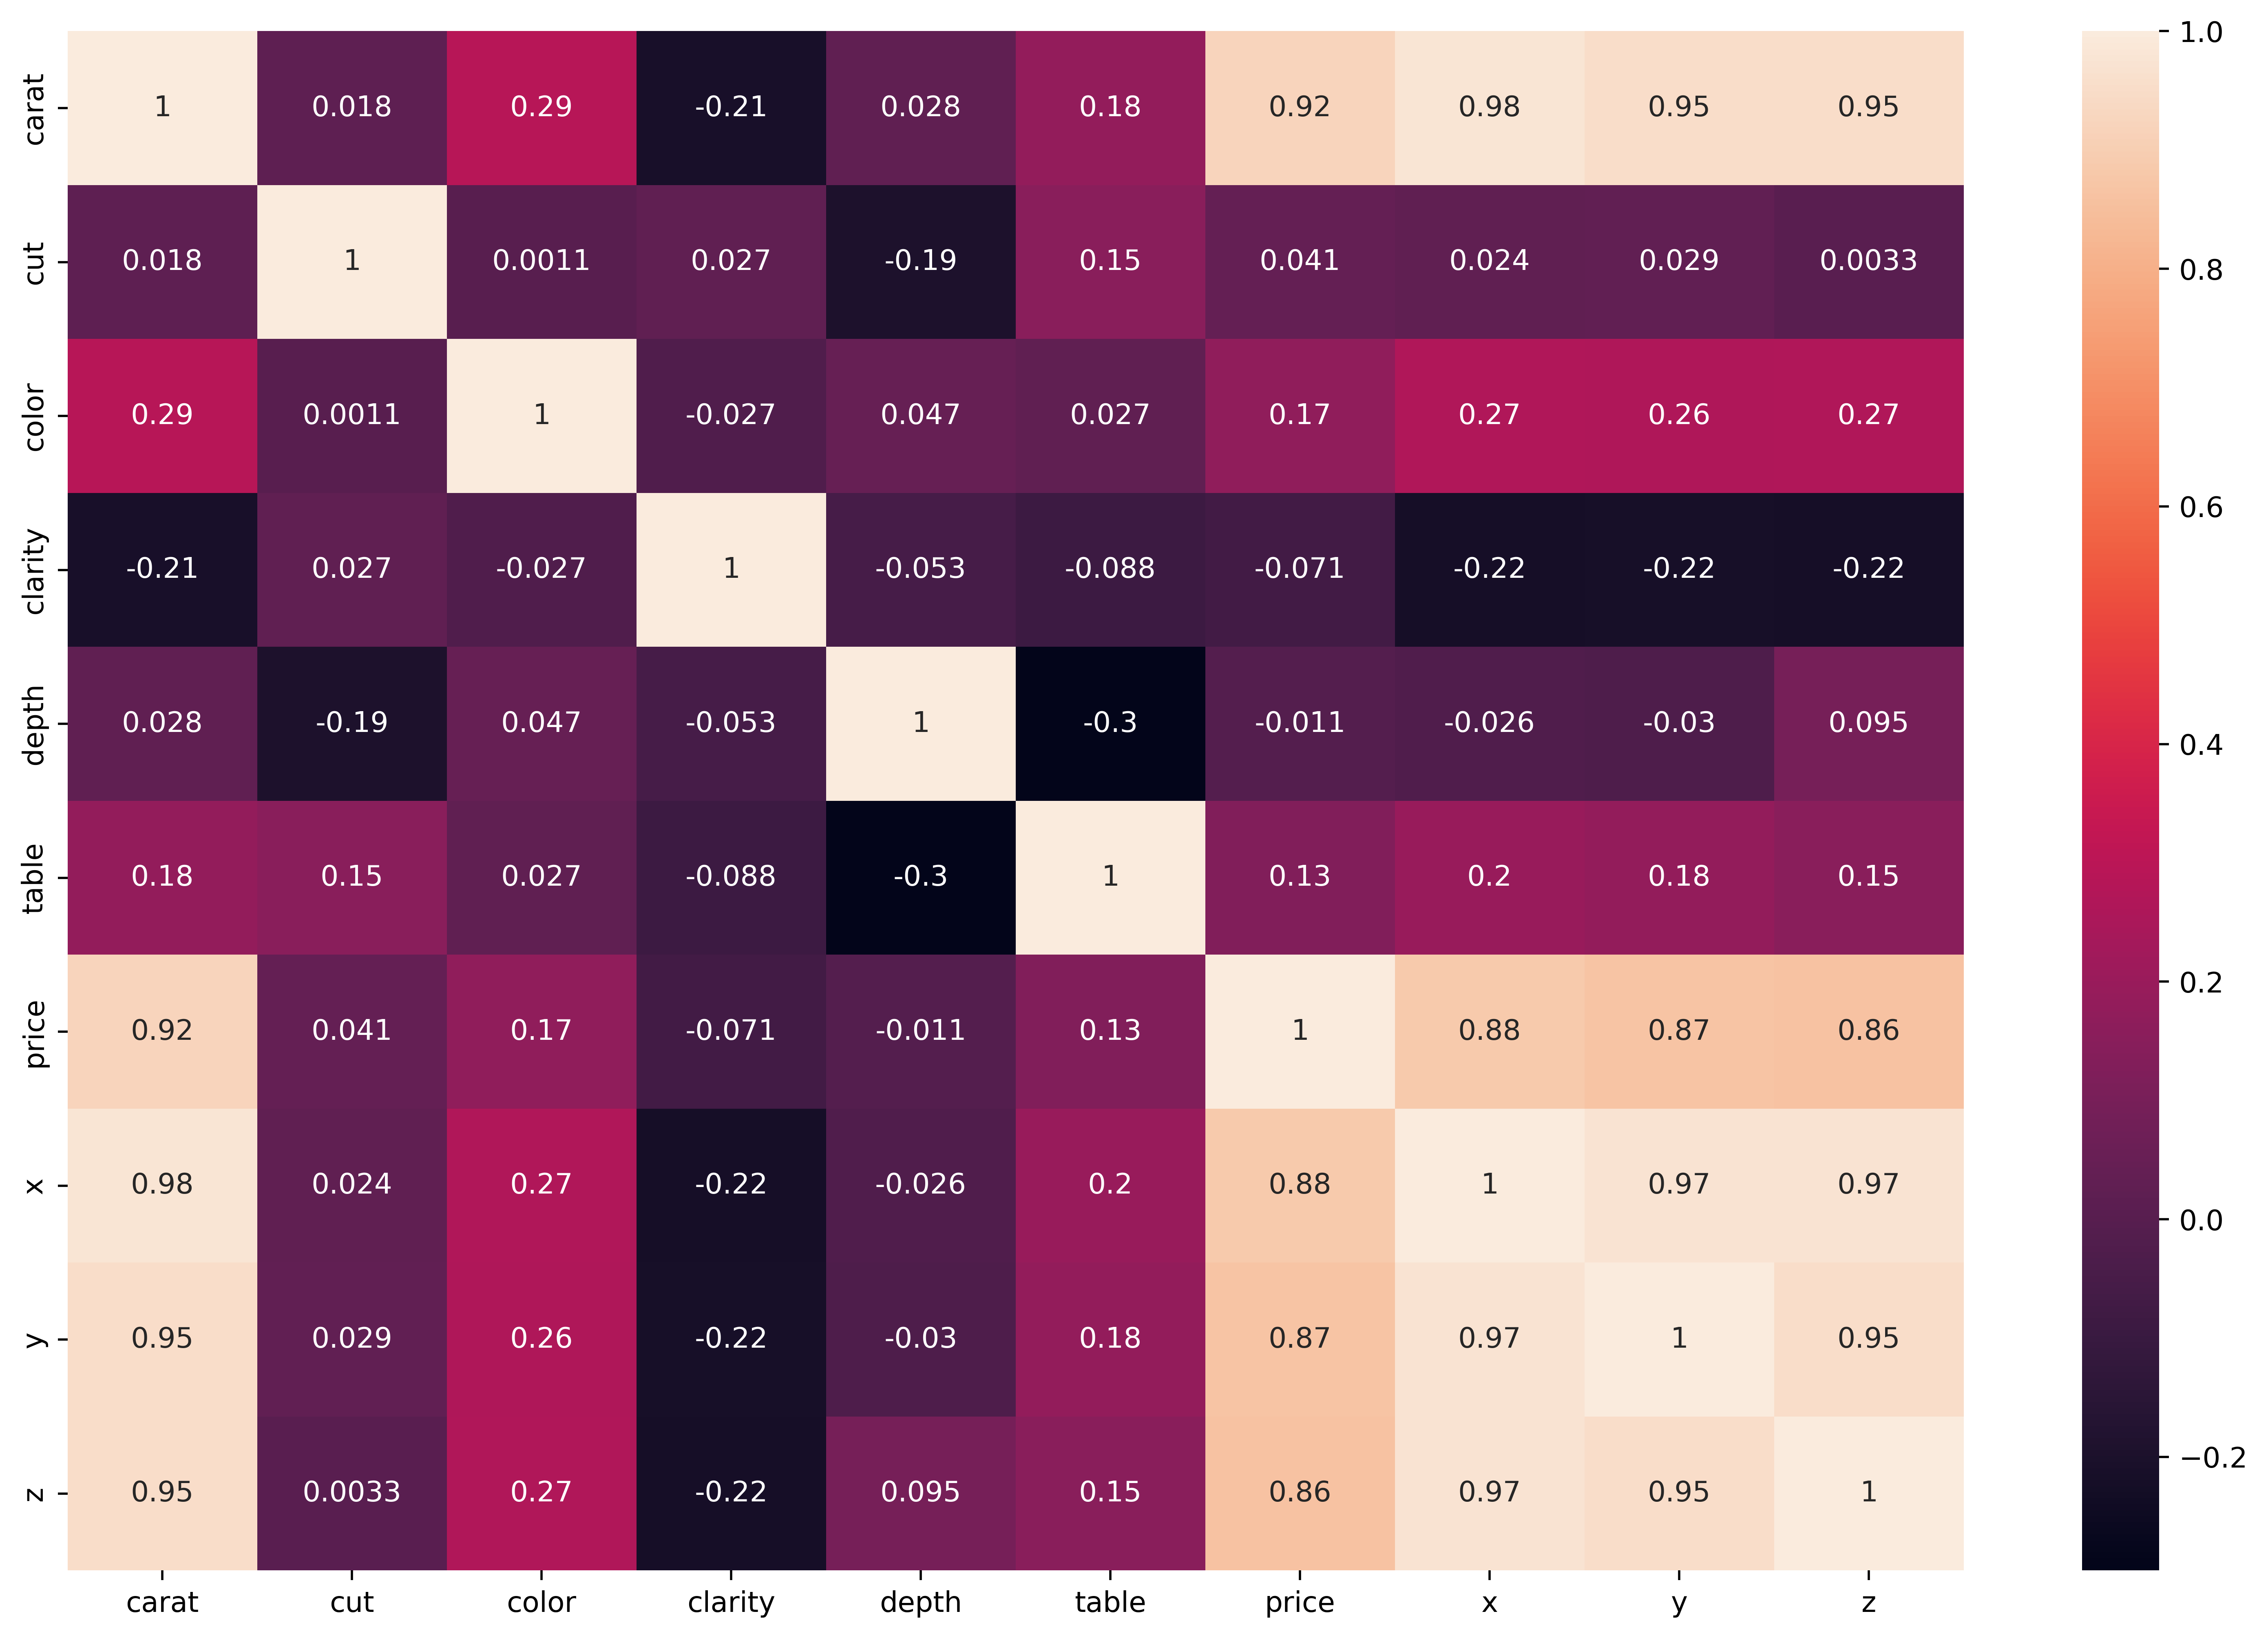

In [47]:
plt.figure(figsize=(15,10),dpi=500)
sns.heatmap(df.corr(),annot=True)

# Looking at the heat map we can say ["carat", "x","y","z"] have highest co-relation to ["price"]
# But further analysis showed that keeping all the columns improves overall accuracy

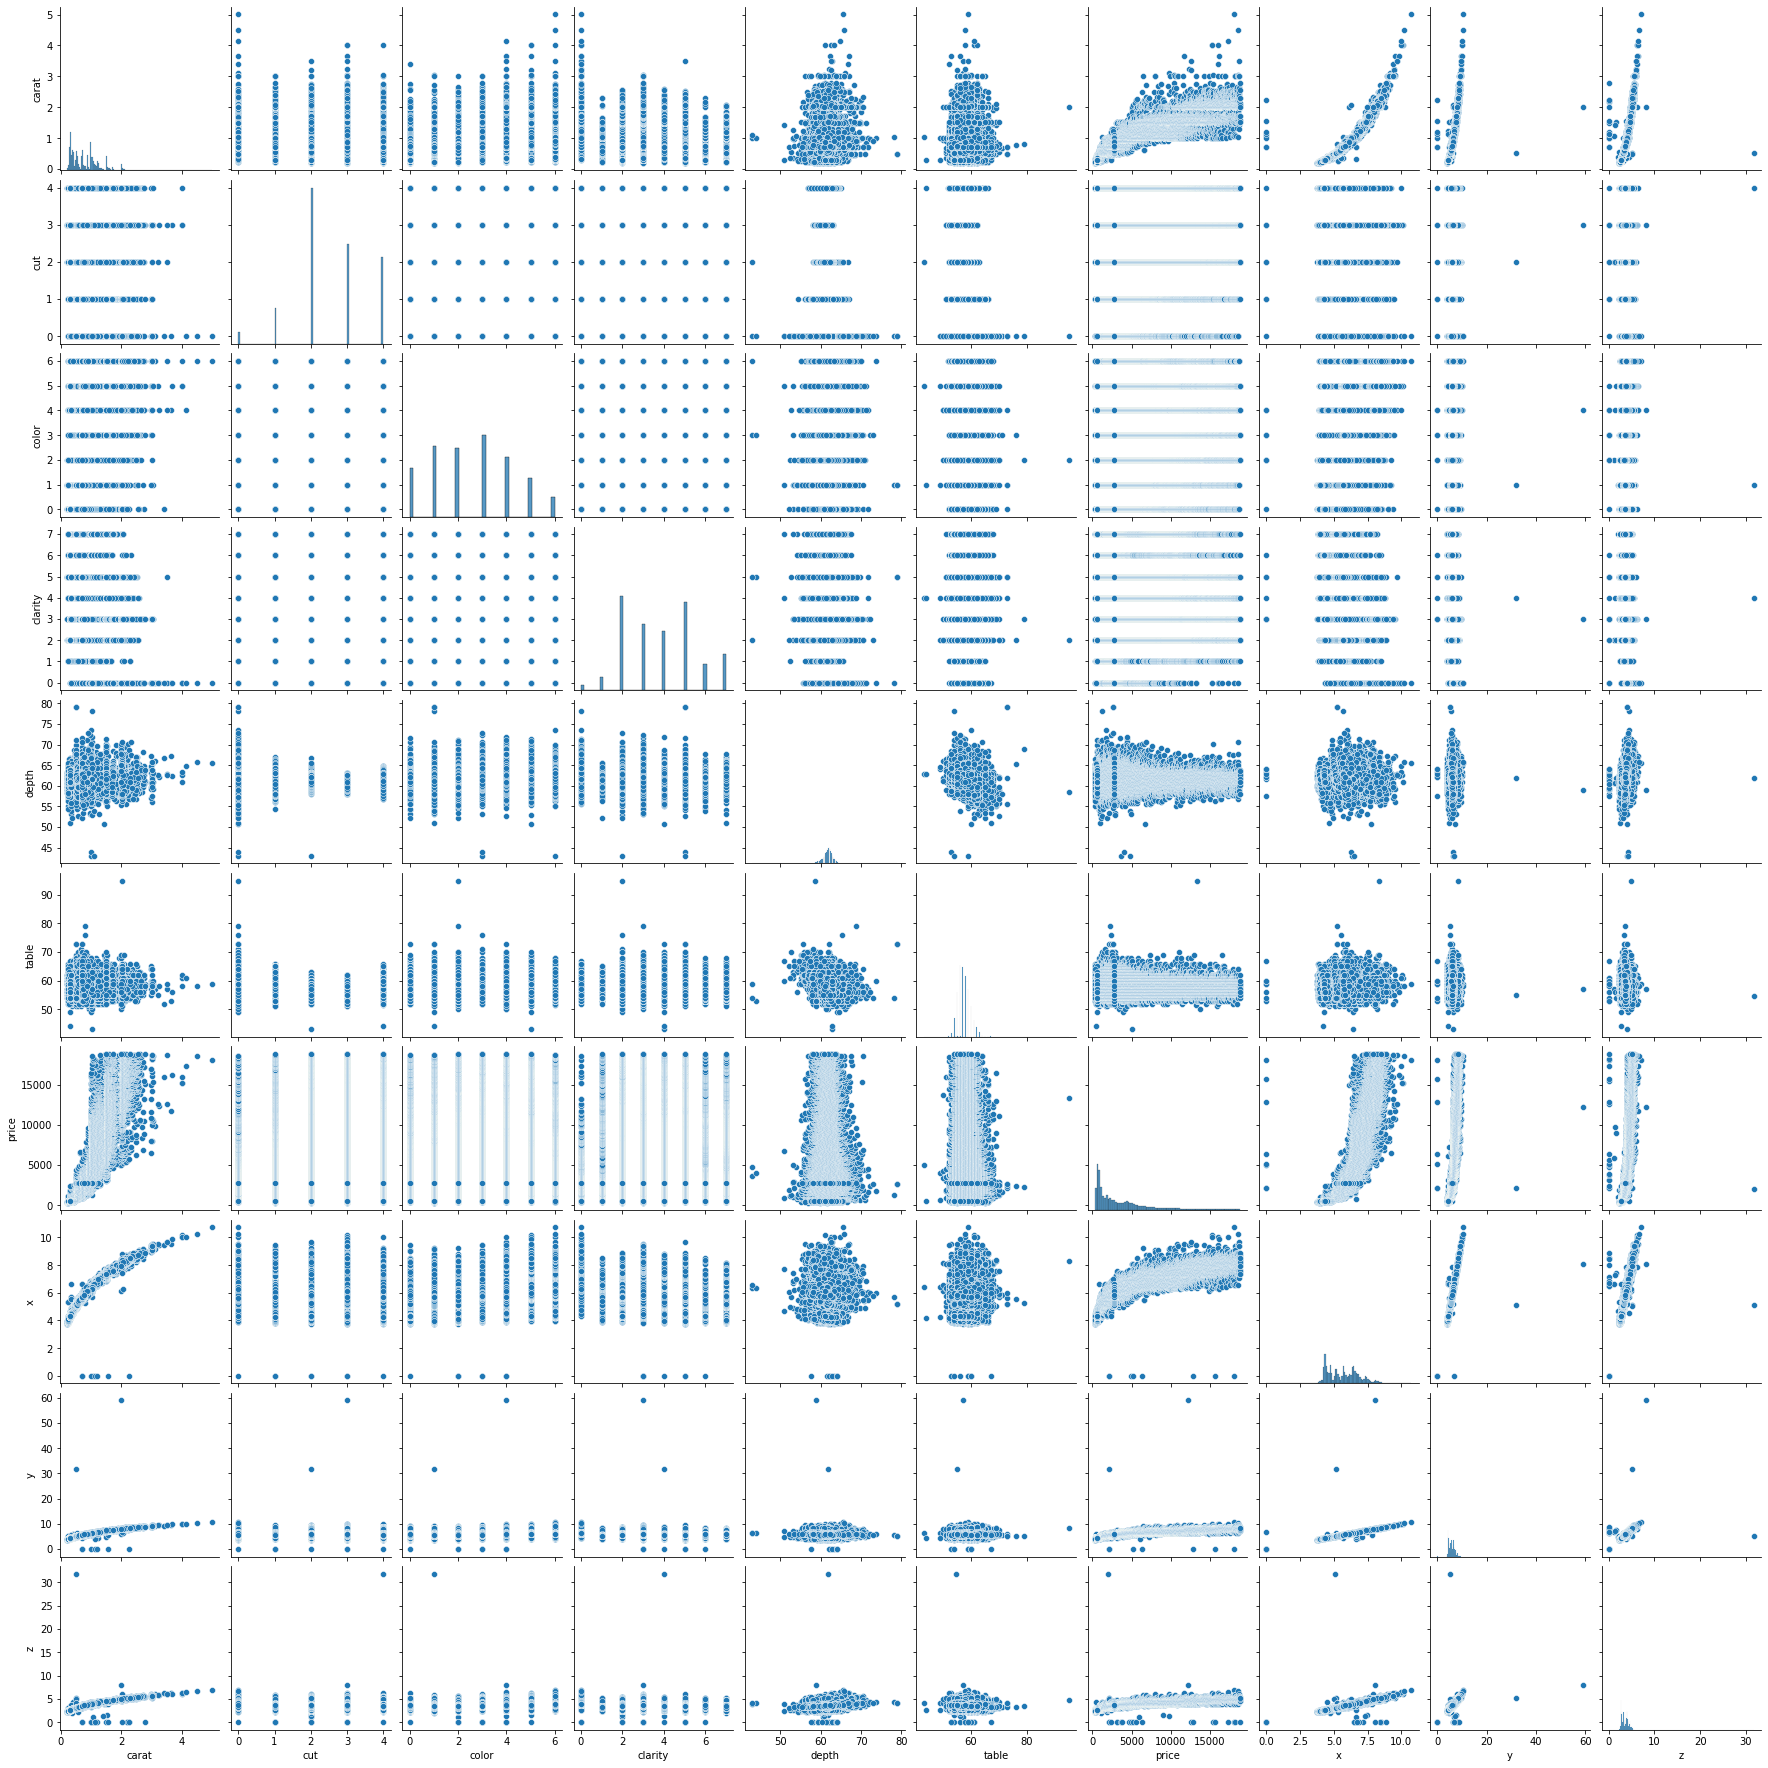

In [48]:
sns.pairplot(df)

# on close observation plots of ["carat", "x","y","z","table","depth"] vs ["price"] have a few outliers

#### Removing outliers

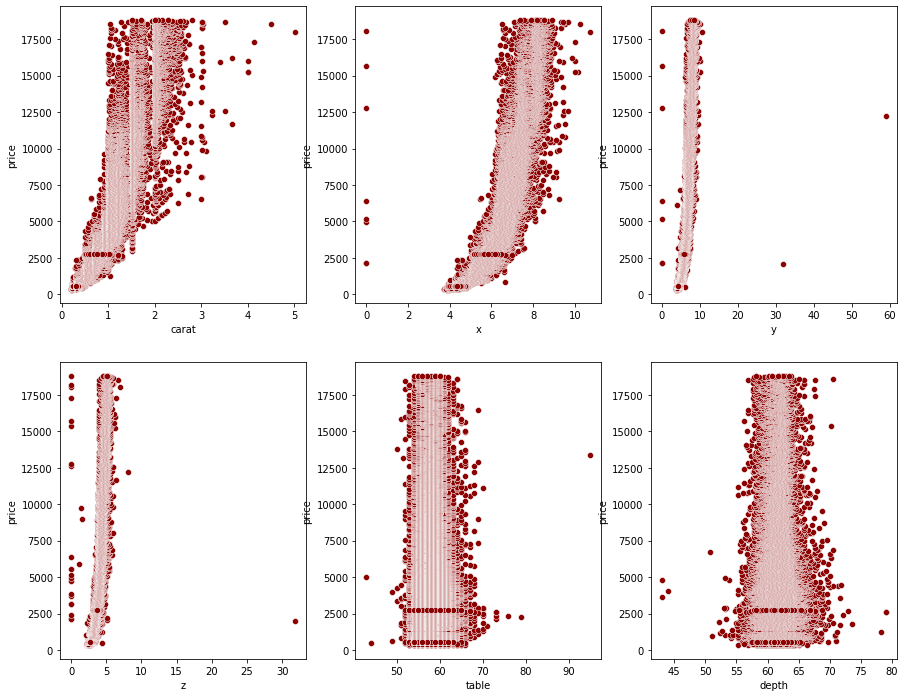

In [49]:
## Plots before removal of outliers

cols=["carat","x","y","z","table","depth"]
fig,ax=plt.subplots(2,3,figsize=(15,12))
ax=ax.flatten()
i=0
for col in cols:
    sns.scatterplot(df[col],df["price"],ax=ax[i],color="darkred")
    i+=1

In [50]:
## Remove all the outliers

df = df[(df["depth"]<75)&(df["depth"]>45)]
df=df[(df["table"]<80) & (df["table"]>40)]
df=df[df["carat"]<3]
df=df[(df["x"]>=2.5) & (df["x"]<=10)]
df=df[(df["y"]>0) & (df["y"]<=20)]
df=df[(df["z"]>=2) & (df["z"]<=6)]

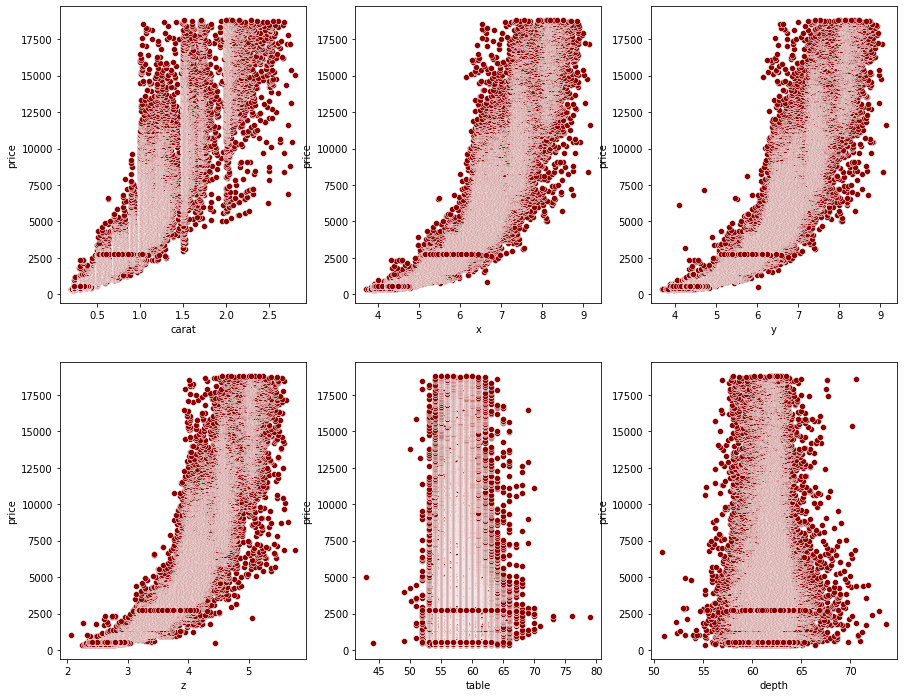

In [51]:
## Plots after removal of outliers

fig,ax=plt.subplots(2,3,figsize=(15,12))
ax=ax.flatten()
i=0
for col in cols:
    sns.scatterplot(df[col],df["price"],ax=ax[i],color="darkred")
    i+=1

#### Selecting dependent and independent variables

In [52]:
# Based on the heatmap and co-realtions we will select dependent and independent variables
x=df.drop(["price"],axis =1)
y=df["price"]

### Model Selection

#### Importing diffrent models for selection

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from sklearn.model_selection import train_test_split

#### Pipeline Creation

In [54]:
# Split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=7)

# Building pipelins of standard scaler, Polynomial features and models of varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipeline_pr=Pipeline([("polynomial",PolynomialFeatures(degree=2)),
                     ("rf_classifier",LinearRegression())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb,pipeline_pr]
            

# List of all the models
models=["Linear Regression","Decission Tree","Random Forest","K Nearest Neighbour","XGBoost","Polynomial Regression"]

#### Accuracy Testing

In [55]:

# Dictionary to hold model names and their respective R2 score

accuracy_dict={}
i=0
for pipe in pipelines:
    pipe.fit(x_train,y_train)
    prediction=pipe.predict(x_test)
    score= metrics.r2_score(y_test,prediction)
    accuracy_dict[models[i]]=score
    i+=1

accuracy_dict

{'Linear Regression': 0.8957618638864788,
 'Decission Tree': 0.9647392367601767,
 'Random Forest': 0.9816194841484379,
 'K Nearest Neighbour': 0.9607784016042836,
 'XGBoost': 0.9822423824304617,
 'Polynomial Regression': 0.9322978780297009}

In [56]:
# Based on the accuracies, XGBoost performs the best, lets use it as the final algorithm

xgb_prediction=pipeline_xgb.predict(x_test)

print("------------Performance Report----------------")
print("R Squared Value          : ",metrics.r2_score(y_test, xgb_prediction))
print("Adjusted R Squared Value : ",1 - (1-metrics.r2_score(y_test, xgb_prediction))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Mean Absolute Error      : ",metrics.mean_absolute_error(y_test, xgb_prediction))
print("Mean Squared Error       : ",metrics.mean_squared_error(y_test, xgb_prediction))
print("Root Mean Squared Error  : ",np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction)))

------------Performance Report----------------
R Squared Value          :  0.9822423824304617
Adjusted R Squared Value :  0.982230492937966
Mean Absolute Error      :  273.2015441522476
Mean Squared Error       :  278097.4573614133
Root Mean Squared Error  :  527.3494641709739


#### Visualization of Predictions

<AxesSubplot:>

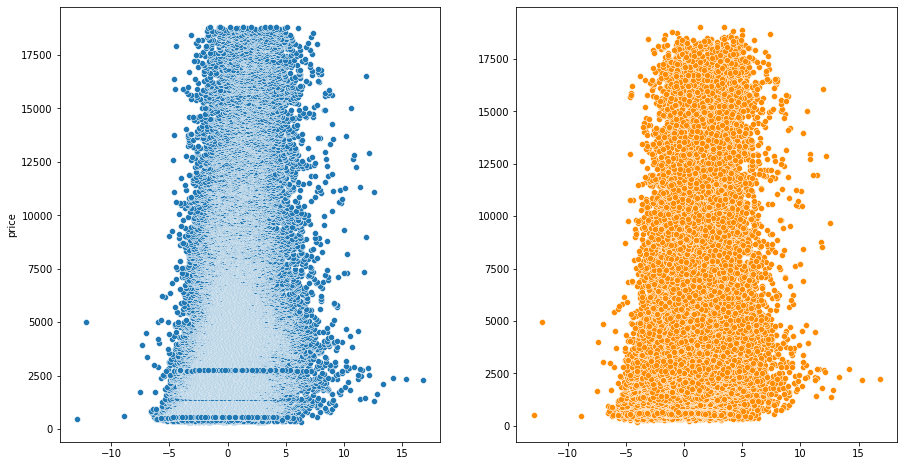

In [57]:
# Plot of test set and predictions

from sklearn.decomposition import PCA

total_prediction=pipeline_xgb.predict(x)

principle_component=PCA(n_components=1)
x_comp=principle_component.fit_transform(x)

# plt.scatter(x_comp,y)
# plt.scatter(x_comp,total_prediction,color="red")

fig,ax=plt.subplots(1,2,figsize=(15,8))
ax=ax.flatten()
sns.scatterplot(x_comp.flatten(),y,ax=ax[0])
sns.scatterplot(x_comp.flatten(),total_prediction,ax=ax[1],color="darkorange")

### Pickel File Creation

In [58]:
# Since XGBoost Performs the best of all the tested models, lets use it as a final algorithm
import pickle

# create the file to store the model
file = open('Diamond_Price_Prediction_model.pkl', 'wb')

# store the model using pickle
pickle.dump(pipeline_xgb, file)

# save the file
file.close()

# End of Notebook